# American Time Use Survey

[Data and documentation](https://www.bls.gov/tus/data.htm)

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime as dt
from zipfile import ZipFile
import os

In [3]:
files = ['sum','resp'] # ["resp", "rost", "sum", "act", "cps", "who"]

ATUS = dict()

# multiyear data
# Zip files have URLs like https://www.bls.gov/tus/datafiles/atusrost-0322.zip
# Above pattern can change year to year. Update accordingly.

base_url = 'https://www.bls.gov/tus/datafiles/atus'
ending = f'-03{(dt.date.today() - dt.timedelta(days = 399)).strftime("%y")}.zip'


# Download data, read to pandas, and delete local files
for file in files:
    url = f'{base_url}{file}{ending}'
    r = requests.get(url)
    
    # Try to get data directly from web 
    try:
        # this doesn't work Aug '23 because BLS blocks bots
        z = ZipFile(io.BytesIO(r.content))
        z.extractall()
        ATUS[file] = pd.read_csv(z.open(ending))
    
    # Download files locally then delete
    except:
        print(url, 'click to download')
        input('Confirm Download')
        
        os.system(f'cp ~/Downloads/atus{file}{ending} {os.getcwd()}')
        with ZipFile(f'atus{file}{ending}', 'r') as z:
            z.extractall()
            dat = ending.replace(".zip",'.dat').replace("-",'_')
            ATUS[file] = pd.read_csv(z.open(f'atus{file}{dat}'))
            
            # delete files
            files = !ls
            for f in files:
                if f.startswith(f'atus{file}') or f.endswith("_info.txt"):
                    os.system(f"rm {f}")

https://www.bls.gov/tus/datafiles/atussum-0322.zip click to download
Confirm Downloady
https://www.bls.gov/tus/datafiles/atusresp-0322.zip click to download
Confirm Downloady


In [4]:
ATUS[file].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236591 entries, 0 to 236590
Columns: 133 entries, TUCASEID to TU20FWGT
dtypes: float64(5), int64(126), object(2)
memory usage: 240.1+ MB


In [5]:
ATUS['sum']

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,0,0,0,0,0,0,0,0,0,0
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236586,20221212222086,-1,1,43,2,4,43,1,1,2,...,0,0,0,0,0,0,0,0,0,0
236587,20221212222264,-1,1,40,2,1,43,1,2,2,...,0,0,0,0,0,0,0,0,0,0
236588,20221212222322,-1,2,40,2,1,64,5,-1,-1,...,0,0,0,0,0,0,0,0,0,0
236589,20221212222359,-1,1,42,2,1,80,5,-1,-1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

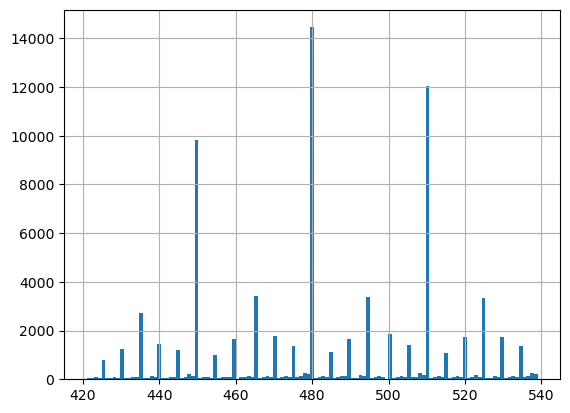

In [11]:
sleeping = ATUS['sum'].t010101 #.hist(bins = 1400)
sleeping = sleeping[sleeping > 7*60]
sleeping = sleeping[sleeping < 9*60]

sleeping.hist(bins = 121)

<Axes: >

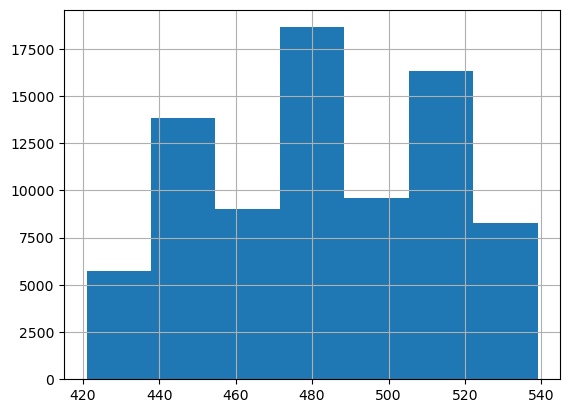

In [17]:
sleeping.hist(bins = 7)